### Setup

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box

WAS data

In [7]:
# Read in data
SARP_09_20_filepath = "./Copy of SARP 2009 to 2020 sent to Alex with plotting.xlsx"
SARP_09_20 = pd.read_excel(SARP_09_20_filepath, skipfooter=6)
geoSARP_09_20 = gpd.GeoDataFrame(SARP_09_20, 
                                 geometry=gpd.points_from_xy(SARP_09_20['Longitude'], 
                                                   SARP_09_20['Latitude']),
                                crs='epsg:4326')

# Trim data down to just one area and type
soca_bbox = box(-125, 27, -114, 42)
geoSARP_09_20 = gpd.clip(geoSARP_09_20, soca_bbox)
geoSARP_09_20 = geoSARP_09_20[geoSARP_09_20['Flight or Ground'] == 'Ground']

Rail data

In [8]:
rail_stations = gpd.read_file('Rail_Interstate_Stations.geojson')

## Side tangent: mapping

`conda install -c conda-forge pyepsg -n lessons`

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors

C:\Users\SARP Participant\.conda\envs\lessons\lib\site-packages\cartopy\mpl\geoaxes.py:1624: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  result = matplotlib.axes.Axes.scatter(self, *args, **kwargs)


<GeoAxesSubplot:>

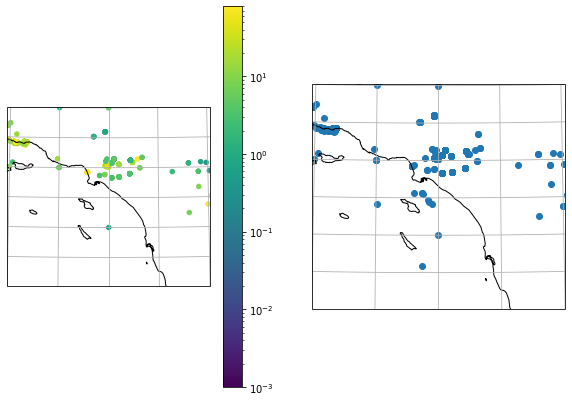

In [10]:
# Define map projection and extent (you'll need to change this to your area)
central_lon, central_lat = -118, 33.5
map_crs=ccrs.Orthographic(central_lon, central_lat)
extent = [-120, -116, 32, 35]  # minx maxx miny maxy

# set up a blank map with multiple subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,7),
                      subplot_kw={'projection': map_crs})

# Add maps coastlines and grids to our axes and set to proper area (extent)
ax1.coastlines()
ax1.gridlines()
ax1.set_extent(extent)
ax2.coastlines()
ax2.gridlines()
ax2.set_extent(extent)

# Plot our data on our map (You'll need to use your dataframe here)
geoSARP_09_20_ortho = geoSARP_09_20.to_crs(map_crs.proj4_init)
geoSARP_09_20_ortho['proj_lon']=geoSARP_09_20_ortho.geometry.x.values
geoSARP_09_20_ortho['proj_lat']=geoSARP_09_20_ortho.geometry.y.values
geoSARP_09_20_ortho.plot.scatter('proj_lon', 'proj_lat', ax=ax1, c=geoSARP_09_20['DMS (MS)'], 
                                 cmap='viridis', vmin=0.001, vmax=80, norm=matplotlib.colors.LogNorm())

# Adding data to the second axis
geoSARP_09_20_ortho.plot(ax=ax2)

